### Importing Needed Packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Extracting Data from respected file path 

In [38]:
file_path = 'F:\Machine learning\Coursera Excel\FuelConsumption.csv'
CO2_Emission_data = pd.read_csv(file_path)
print("Dataset is read")

Dataset is read


### Displaying first five rows

In [21]:
CO2_Emission_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploring the data

In [22]:
CO2_Emission_data.describe()  #summarizing the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Selecting features to explore more

In [23]:
CO2_selected_features_df = CO2_Emission_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
CO2_selected_features_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


### Plotting histograms

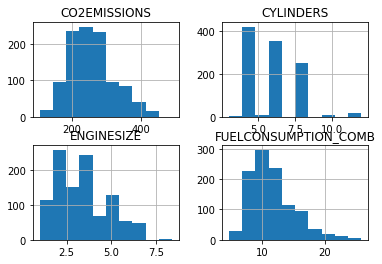

In [24]:
CO2_selected_features_df.hist()
plt.show()

### Plotting Each Features against CO2EMISSIONS to see how linear their relationship is

#### Plotting FUELCONSUMPTION_COMB against CO2EMISSION

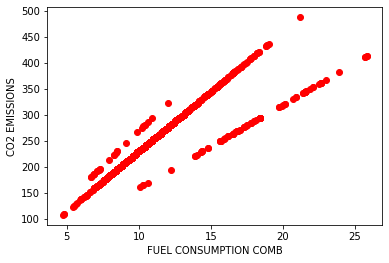

In [25]:
plt.scatter(CO2_selected_features_df.FUELCONSUMPTION_COMB, CO2_selected_features_df.CO2EMISSIONS, color= 'red')
plt.xlabel("FUEL CONSUMPTION COMB")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Plotting ENGINESIZE against CO2EMISSION

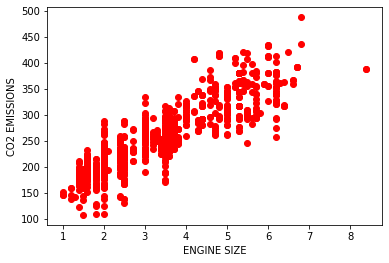

In [26]:
plt.scatter(CO2_selected_features_df.ENGINESIZE, CO2_selected_features_df.CO2EMISSIONS, color='red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Plotting CYLINDERS against CO2EMISSIONS

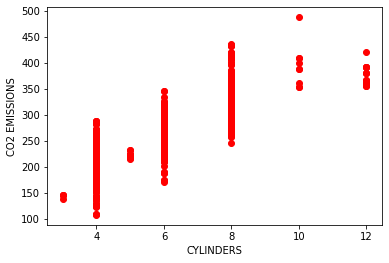

In [27]:
plt.scatter(CO2_selected_features_df.CYLINDERS, CO2_selected_features_df.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSIONS")
plt.show()

### Creating train and test dataset

Spliting dataset into training and testing sets provides a more accurate evaluation on out-of-sample accuracy because testing set is not part of dataset that have been used to train the model.

Out-of-sample accuracy is the percentage of correct predictions that model makes on data that the model has not been trained.

Splilting dataset such that 80% of it are used as training and 20% as testing. We create a mask to select random rows using <b>np.random.rand()</b> function.

In [28]:
msk = np.random.rand(len(CO2_selected_features_df))<0.8
train = CO2_selected_features_df[msk]
test = CO2_selected_features_df[~msk]

### Distribution of Training Data

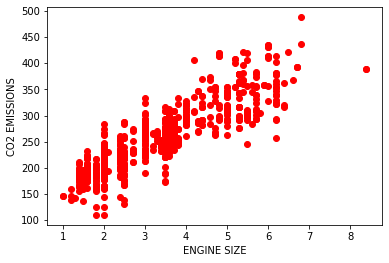

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

### Simple Linear Regression
Linear Regression Model fits a linear model with co-efficient B = (B1,....Bn) to minimize the "residual sum of squares" between the actual value in dataset and the prediced value by model using linear approximation.

In <b>Simple Linear Regression</b>, there are two variables:-
Dependent variable (Y) : CO2 EMISSION
Independent variable (X) : ENGINE SIZE

### Training the model using sklearn package

In [30]:
from sklearn import linear_model
model_obj = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]
model_obj.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Displaying parameters (i.e co-efficient and intercept)

In [31]:
print('Coefficients: ',model_obj.coef_)
print('Intercept: ',model_obj.intercept_)

Coefficients:  [[39.24437299]]
Intercept:  [126.04444946]


### Plotting the output

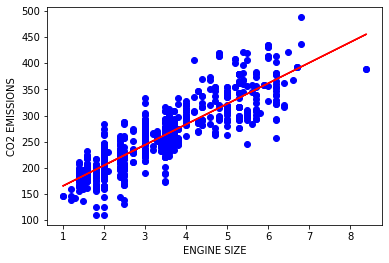

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x,model_obj.coef_[0][0]*train_x + model_obj.intercept_[0],'-r')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

### Predicting values of test set

In [33]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
prediction = model_obj.predict(test_x)

### Model Evaluation

#### Mean Absolute Error (MAE)
It is the mean of the absolute value of the errors

In [34]:
MAE = float(np.mean(np.absolute(prediction - test_y)))
print("Mean absolute error : ",MAE)

Mean absolute error :  23.635778467062725


#### Mean Square Error (MSE)
It is mean of the squared error.

In [35]:
MSE = float(np.mean((prediction - test_y)**2))
print("Mean Square Error: ",MSE)

Mean Square Error:  968.4916310820108


#### R2 - score
It is not an error, but it is a metric that measures the performance of regression model. It represents how close the data points are to the fitted regression line.

In [36]:
from sklearn.metrics import r2_score
score = r2_score(test_y, prediction)
print("R2-score: ",score)

R2-score:  0.7706749123638147


Here, 77% of the data fits the regression model. The higher the value of R-squared value (r2-score), the better the model fits the data. 